# ARITMIA BACKEND BRANCH - DATA SCIENCE REPORT


In [1]:
import pandas as pd 
import numpy as np
data = pd.read_csv("heart.csv")
data

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

## Reading and understanding the dataset heart.csv 

In [2]:
## Sex distibution 
A_S_data = data.groupby(["Age","Sex"]).size().reset_index(name='counts')
A_S_data

Age Sex  counts
0    28   M       1
1    29   M       3
2    30   F       1
3    31   F       1
4    31   M       1
..  ...  ..     ...
86   74   M       6
87   75   M       3
88   76   F       1
89   76   M       1
90   77   M       2

[91 rows x 3 columns]

In [3]:
%%capture
! pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## General stats for the dataset heart.csv  

In [4]:
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

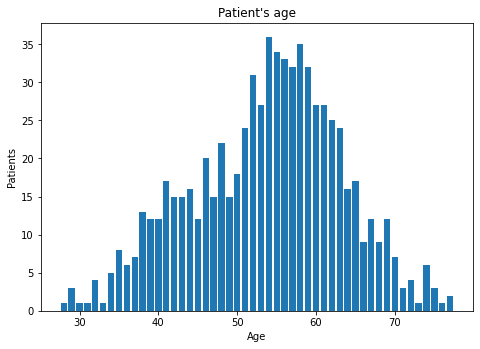

In [5]:
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1])
ax.bar(A_S_data["Age"],A_S_data["counts"])
ax.set_ylabel('Patients')
ax.set_xlabel('Age')
ax.set_title("Patient's age")
plt.show()


In [6]:
male_distribution = A_S_data.loc[A_S_data['Sex']=='M']
female_distribution = A_S_data.loc[A_S_data['Sex']=='F']
male_distribution["counts"].sum()

725

In [7]:
female_distribution["counts"].sum()

193

### Measuring Feature impact by calculating the correlation matrix. 

In [8]:
data.corr()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

### Dertermination whether sex is or not correlated to a Heart Disease Event. 

In [9]:
CrosstabResult=pd.crosstab(index=data['Sex'],columns=data['HeartDisease'])
from scipy.stats import chi2_contingency
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 4.597617450809164e-20


Since the p-value is less than 0.05 it is possible to state that Sex IS correlated to Heart Disease 

In [10]:
male_data = data.loc[data['Sex']=='M']
male_data


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
2     37   M           ATA        130          283          0         ST   
4     54   M           NAP        150          195          0     Normal   
5     39   M           NAP        120          339          0     Normal   
7     54   M           ATA        110          208          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
911   59   M           ASY        164          176          1        LVH   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
2       98              N      0.0       Up             0  
4      122              N      0.0       Up             0  
5      170              N      0.0       Up             0  
7      142              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
911     90              N      1.0     Flat             1  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
917    173              N      0.0       Up             0  

[725 rows x 12 columns]

In [11]:
male_data.corr()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.237361    -0.131078   0.198718 -0.396827  0.260197   
RestingBP     0.237361   1.000000     0.108147   0.071515 -0.118825  0.148407   
Cholesterol  -0.131078   0.108147     1.000000  -0.254965  0.235567  0.072973   
FastingBS     0.198718   0.071515    -0.254965   1.000000 -0.103866  0.028514   
MaxHR        -0.396827  -0.118825     0.235567  -0.103866  1.000000 -0.144315   
Oldpeak       0.260197   0.148407     0.072973   0.028514 -0.144315  1.000000   
HeartDisease  0.291041   0.063526    -0.195357   0.229916 -0.396443  0.388127   

              HeartDisease  
Age               0.291041  
RestingBP         0.063526  
Cholesterol      -0.195357  
FastingBS         0.229916  
MaxHR            -0.396443  
Oldpeak           0.388127  
HeartDisease      1.000000

In [12]:
female_data = data.loc[data['Sex']=='F']

female_data.corr()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.314942     0.132360   0.171380 -0.305550  0.232623   
RestingBP     0.314942   1.000000     0.089545   0.066280 -0.092007  0.235287   
Cholesterol   0.132360   0.089545     1.000000  -0.171293  0.034974  0.075082   
FastingBS     0.171380   0.066280    -0.171293   1.000000 -0.154962  0.106670   
MaxHR        -0.305550  -0.092007     0.034974  -0.154962  1.000000 -0.142954   
Oldpeak       0.232623   0.235287     0.075082   0.106670 -0.142954  1.000000   
HeartDisease  0.229711   0.299215    -0.124261   0.320900 -0.222635  0.413311   

              HeartDisease  
Age               0.229711  
RestingBP         0.299215  
Cholesterol      -0.124261  
FastingBS         0.320900  
MaxHR            -0.222635  
Oldpeak           0.413311  
HeartDisease      1.000000

### Finding more high impact features and correlations between variables. 

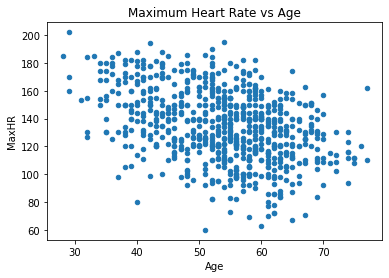

In [13]:
import matplotlib as mpl 

male_data.plot(kind='scatter',x='Age',y='MaxHR')
plt.title('Maximum Heart Rate vs Age')
plt.show()

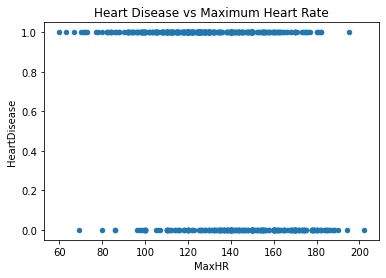

In [14]:
male_data.plot(kind='scatter', x ='MaxHR', y='HeartDisease')
plt.title('Heart Disease vs Maximum Heart Rate' ) 
plt.show()

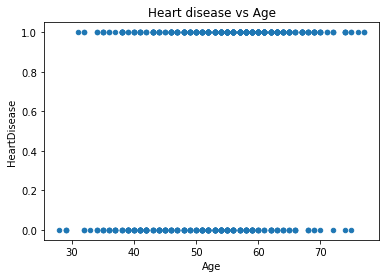

In [15]:
male_data.plot(kind='scatter',x='Age',y='HeartDisease')
plt.title('Heart disease vs Age')
plt.show()

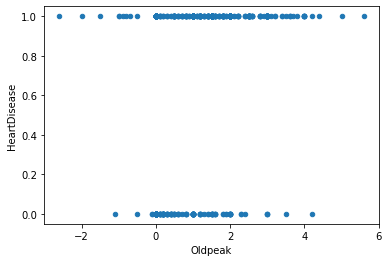

In [16]:
male_data.plot(kind='scatter',x='Oldpeak', y = 'HeartDisease')
plt.show()

In [17]:
chest_pain_type = data.groupby(["ChestPainType","HeartDisease"]).size().reset_index(name='counts')
chest_pain_type

ChestPainType  HeartDisease  counts
0           ASY             0     104
1           ASY             1     392
2           ATA             0     149
3           ATA             1      24
4           NAP             0     131
5           NAP             1      72
6            TA             0      26
7            TA             1      20

In [18]:
rest_ecg = data.groupby(["RestingECG","HeartDisease"]).size().reset_index(name='counts')
rest_ecg

RestingECG  HeartDisease  counts
0        LVH             0      82
1        LVH             1     106
2     Normal             0     267
3     Normal             1     285
4         ST             0      61
5         ST             1     117

In [19]:
slope = data.groupby(["ST_Slope","HeartDisease"]).size().reset_index(name='counts')
slope

ST_Slope  HeartDisease  counts
0     Down             0      14
1     Down             1      49
2     Flat             0      79
3     Flat             1     381
4       Up             0     317
5       Up             1      78

## CORRELATION MATRIX V1.1 

In [20]:
data["Sex"].replace({"M":1,"F":0}, inplace = True )

In [21]:
data.corr()

Age       Sex  RestingBP  Cholesterol  FastingBS     MaxHR  \
Age           1.000000  0.055750   0.254399    -0.095282   0.198039 -0.382045   
Sex           0.055750  1.000000   0.005133    -0.200092   0.120076 -0.189186   
RestingBP     0.254399  0.005133   1.000000     0.100893   0.070193 -0.112135   
Cholesterol  -0.095282 -0.200092   0.100893     1.000000  -0.260974  0.235792   
FastingBS     0.198039  0.120076   0.070193    -0.260974   1.000000 -0.131438   
MaxHR        -0.382045 -0.189186  -0.112135     0.235792  -0.131438  1.000000   
Oldpeak       0.258612  0.105734   0.164803     0.050148   0.052698 -0.160691   
HeartDisease  0.282039  0.305445   0.107589    -0.232741   0.267291 -0.400421   

               Oldpeak  HeartDisease  
Age           0.258612      0.282039  
Sex           0.105734      0.305445  
RestingBP     0.164803      0.107589  
Cholesterol   0.050148     -0.232741  
FastingBS     0.052698      0.267291  
MaxHR        -0.160691     -0.400421  
Oldpeak       1.000000      0.403951  
HeartDisease  0.403951      1.000000

In [22]:
data["ST_Slope"].replace({"Up":1,"Flat":0,"Down":-1,}, inplace = True)
data.corr()

Age       Sex  RestingBP  Cholesterol  FastingBS     MaxHR  \
Age           1.000000  0.055750   0.254399    -0.095282   0.198039 -0.382045   
Sex           0.055750  1.000000   0.005133    -0.200092   0.120076 -0.189186   
RestingBP     0.254399  0.005133   1.000000     0.100893   0.070193 -0.112135   
Cholesterol  -0.095282 -0.200092   0.100893     1.000000  -0.260974  0.235792   
FastingBS     0.198039  0.120076   0.070193    -0.260974   1.000000 -0.131438   
MaxHR        -0.382045 -0.189186  -0.112135     0.235792  -0.131438  1.000000   
Oldpeak       0.258612  0.105734   0.164803     0.050148   0.052698 -0.160691   
ST_Slope     -0.268264 -0.150693  -0.075162     0.111471  -0.175774  0.343419   
HeartDisease  0.282039  0.305445   0.107589    -0.232741   0.267291 -0.400421   

               Oldpeak  ST_Slope  HeartDisease  
Age           0.258612 -0.268264      0.282039  
Sex           0.105734 -0.150693      0.305445  
RestingBP     0.164803 -0.075162      0.107589  
Cholesterol   0.050148  0.111471     -0.232741  
FastingBS     0.052698 -0.175774      0.267291  
MaxHR        -0.160691  0.343419     -0.400421  
Oldpeak       1.000000 -0.501921      0.403951  
ST_Slope     -0.501921  1.000000     -0.558771  
HeartDisease  0.403951 -0.558771      1.000000

# Logistic Regression 

In [23]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [60]:
model_data = data[['Age','Sex','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','ST_Slope','HeartDisease']]
model_data['HeartDisease'] = model_data['HeartDisease'].astype('int')
X = model_data[['Age','Sex','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','ST_Slope']]
Y = model_data['HeartDisease']
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[-1.43,  0.52,  0.41,  0.83, -0.55,  1.38, -0.83,  1.05],
       [-0.48, -1.94,  1.49, -0.17, -0.55,  0.75,  0.11, -0.6 ],
       [-1.75,  0.52, -0.13,  0.77, -0.55, -1.53, -0.83,  1.05],
       [-0.58, -1.94,  0.3 ,  0.14, -0.55, -1.13,  0.57, -0.6 ],
       [ 0.05,  0.52,  0.95, -0.03, -0.55, -0.58, -0.83,  1.05]])

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (734, 8) (734,)
Test set: (184, 8) (184,)


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
parameters_lr = {"C":[0.01,0.1,1],'penalty':['l2'],'solver':['lbfgs']}
grid_search_lr = GridSearchCV(
estimator = lr , 
param_grid = parameters_lr,
scoring = 'accuracy',
cv=10
)
lr_cv = grid_search_lr.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",lr_cv.best_params_)
print("accuracy :", lr_cv.best_score_)


#LR

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spec

tuned hyperparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8283378746594006


In [63]:
print('Accuracy on test data is: {:.3f}'.format(lr_cv.score(X_test, y_test)))

#yhat0 = LR.predict(X_test)
#yhat0

Accuracy on test data is: 0.853


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


## ACCURACY METRICS v1.1

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat0, labels=[1,0]))

[[84 12]
 [15 73]]


Confusion matrix, without normalization
[[84 12]
 [15 73]]


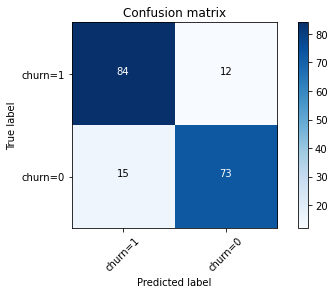

In [29]:
cnf_matrix = confusion_matrix(y_test, yhat0, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [30]:
print (classification_report(y_test, yhat0))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        88
           1       0.85      0.88      0.86        96

   micro avg       0.85      0.85      0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [31]:
yhat_df =  pd.DataFrame(yhat0, columns=['Class']).reset_index()
ytest_df = pd.DataFrame(y_test)
ytest_df = ytest_df.reset_index()
ytest_df


index  HeartDisease
0      476             0
1      244             1
2      701             0
3      634             0
4      687             0
..     ...           ...
179     33             1
180    673             1
181    146             0
182    625             0
183    860             1

[184 rows x 2 columns]

## PLOT PREDICTIONS VS REAL LABELS

Text(0.5, 1.0, 'REAL LABELS')

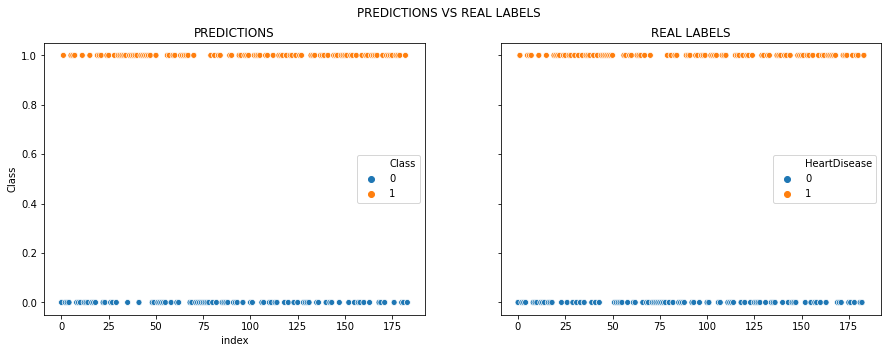

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('PREDICTIONS VS REAL LABELS')

sns.scatterplot(data=yhat_df,ax=axes[0],x="index", y="Class",hue="Class")
axes[0].set_title('PREDICTIONS')

# Charmander
sns.scatterplot(data=ytest_df,ax=axes[1], x=ytest_df.index, y="HeartDisease",hue="HeartDisease")
axes[1].set_title('REAL LABELS')


## CORRELATION MATRIX V1.2 

In [33]:
data["RestingECG"].replace({"Normal":0,"ST":1,"LVH":-1,}, inplace = True)
data.corr()

Age       Sex  RestingBP  Cholesterol  FastingBS  \
Age           1.000000  0.055750   0.254399    -0.095282   0.198039   
Sex           0.055750  1.000000   0.005133    -0.200092   0.120076   
RestingBP     0.254399  0.005133   1.000000     0.100893   0.070193   
Cholesterol  -0.095282 -0.200092   0.100893     1.000000  -0.260974   
FastingBS     0.198039  0.120076   0.070193    -0.260974   1.000000   
RestingECG   -0.007484  0.071552   0.022656    -0.196544   0.087050   
MaxHR        -0.382045 -0.189186  -0.112135     0.235792  -0.131438   
Oldpeak       0.258612  0.105734   0.164803     0.050148   0.052698   
ST_Slope     -0.268264 -0.150693  -0.075162     0.111471  -0.175774   
HeartDisease  0.282039  0.305445   0.107589    -0.232741   0.267291   

              RestingECG     MaxHR   Oldpeak  ST_Slope  HeartDisease  
Age            -0.007484 -0.382045  0.258612 -0.268264      0.282039  
Sex             0.071552 -0.189186  0.105734 -0.150693      0.305445  
RestingBP       0.022656 -0.112135  0.164803 -0.075162      0.107589  
Cholesterol    -0.196544  0.235792  0.050148  0.111471     -0.232741  
FastingBS       0.087050 -0.131438  0.052698 -0.175774      0.267291  
RestingECG      1.000000 -0.179276 -0.020438 -0.006778      0.057384  
MaxHR          -0.179276  1.000000 -0.160691  0.343419     -0.400421  
Oldpeak        -0.020438 -0.160691  1.000000 -0.501921      0.403951  
ST_Slope       -0.006778  0.343419 -0.501921  1.000000     -0.558771  
HeartDisease    0.057384 -0.400421  0.403951 -0.558771      1.000000

In [34]:
data["ChestPainType"].replace({"ASY":0,"ATA":2,"NAP":-1,"TA":1}, inplace = True)
data.corr()

Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age            1.000000  0.055750      -0.160338   0.254399    -0.095282   
Sex            0.055750  1.000000      -0.100496   0.005133    -0.200092   
ChestPainType -0.160338 -0.100496       1.000000  -0.008132     0.125704   
RestingBP      0.254399  0.005133      -0.008132   1.000000     0.100893   
Cholesterol   -0.095282 -0.200092       0.125704   0.100893     1.000000   
FastingBS      0.198039  0.120076      -0.088518   0.070193    -0.260974   
RestingECG    -0.007484  0.071552       0.027952   0.022656    -0.196544   
MaxHR         -0.382045 -0.189186       0.165872  -0.112135     0.235792   
Oldpeak        0.258612  0.105734      -0.155260   0.164803     0.050148   
ST_Slope      -0.268264 -0.150693       0.222136  -0.075162     0.111471   
HeartDisease   0.282039  0.305445      -0.240025   0.107589    -0.232741   

               FastingBS  RestingECG     MaxHR   Oldpeak  ST_Slope  \
Age             0.198039   -0.007484 -0.382045  0.258612 -0.268264   
Sex             0.120076    0.071552 -0.189186  0.105734 -0.150693   
ChestPainType  -0.088518    0.027952  0.165872 -0.155260  0.222136   
RestingBP       0.070193    0.022656 -0.112135  0.164803 -0.075162   
Cholesterol    -0.260974   -0.196544  0.235792  0.050148  0.111471   
FastingBS       1.000000    0.087050 -0.131438  0.052698 -0.175774   
RestingECG      0.087050    1.000000 -0.179276 -0.020438 -0.006778   
MaxHR          -0.131438   -0.179276  1.000000 -0.160691  0.343419   
Oldpeak         0.052698   -0.020438 -0.160691  1.000000 -0.501921   
ST_Slope       -0.175774   -0.006778  0.343419 -0.501921  1.000000   
HeartDisease    0.267291    0.057384 -0.400421  0.403951 -0.558771   

               HeartDisease  
Age                0.282039  
Sex                0.305445  
ChestPainType     -0.240025  
RestingBP          0.107589  
Cholesterol       -0.232741  
FastingBS          0.267291  
RestingECG         0.057384  
MaxHR             -0.400421  
Oldpeak            0.403951  
ST_Slope          -0.558771  
HeartDisease       1.000000

## Adding Chest pain type and Resting Electrocardiogram to the feature set. 

In [64]:
model_data = data[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','Oldpeak','ST_Slope','HeartDisease']]
model_data['HeartDisease'] = model_data['HeartDisease'].astype('int')
X = model_data[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','Oldpeak','ST_Slope']]
Y = model_data['HeartDisease']
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[-1.43,  0.52,  1.81,  0.41,  0.83, -0.55,  0.02,  1.38, -0.83,
         1.05],
       [-0.48, -1.94, -1.22,  1.49, -0.17, -0.55,  0.02,  0.75,  0.11,
        -0.6 ],
       [-1.75,  0.52,  1.81, -0.13,  0.77, -0.55,  1.6 , -1.53, -0.83,
         1.05],
       [-0.58, -1.94, -0.21,  0.3 ,  0.14, -0.55,  0.02, -1.13,  0.57,
        -0.6 ],
       [ 0.05,  0.52, -1.22,  0.95, -0.03, -0.55,  0.02, -0.58, -0.83,
         1.05]])

### Train / Test split to the Feature Dataset 

In [65]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (734, 10) (734,)
Test set: (184, 10) (184,)


In [66]:
lr = LogisticRegression()
parameters_lr = {"C":[0.01,0.1,1],'penalty':['l2'],'solver':['lbfgs']}
grid_search_lr = GridSearchCV(
estimator = lr , 
param_grid = parameters_lr,
scoring = 'accuracy',
cv=10
)
lr_cv = grid_search_lr.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",lr_cv.best_params_)
print("accuracy :", lr_cv.best_score_)


#LR = LogisticRegression(C=0.01,solver= 'liblinear').fit(X_train,y_train)
#LR

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spec

tuned hyperparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8256130790190735


### Prediction Making with the new feature test 

In [67]:
print('Accuracy on test data is: {:.3f}'.format(lr_cv.score(X_test, y_test)))
#yhat1 = LR.predict(X_test)
#yhat1

Accuracy on test data is: 0.859


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


## LOGISTIC REGRESSION ACCURACY METRICS V1.2

In [39]:
print(confusion_matrix(y_test, yhat1, labels=[1,0]))

[[85 11]
 [15 73]]


Confusion matrix, without normalization
[[85 11]
 [15 73]]


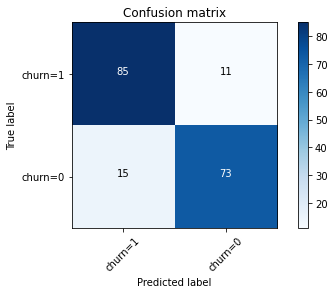

In [40]:
cnf_matrix = confusion_matrix(y_test, yhat1, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [41]:
print (classification_report(y_test, yhat1))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        88
           1       0.85      0.89      0.87        96

   micro avg       0.86      0.86      0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



## PREDICTED LABELS VS REAL LABELS PLOT 

Text(0.5, 1.0, 'REAL LABELS')

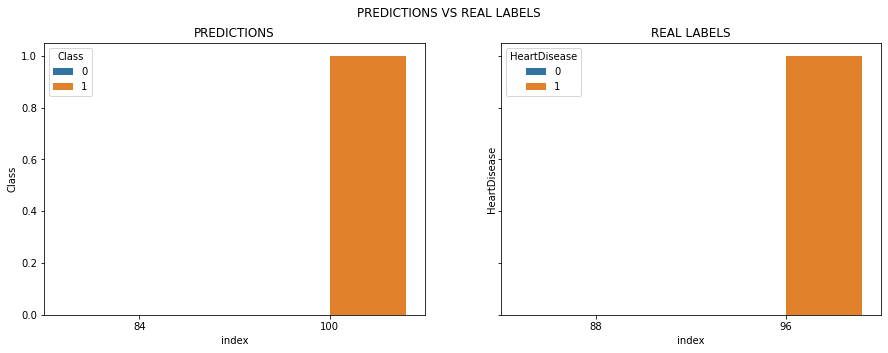

In [42]:
yhat_df =  pd.DataFrame(yhat1, columns=['Class']).reset_index()
ytest_df = pd.DataFrame(y_test)
ytest_df = ytest_df.reset_index()

yhat_bins = yhat_df.groupby('Class').count().reset_index()
ytest_bins = ytest_df.groupby('HeartDisease').count().reset_index()






fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('PREDICTIONS VS REAL LABELS')

sns.barplot(data=yhat_bins,ax=axes[0],x="index", y="Class",hue="Class")
axes[0].set_title('PREDICTIONS')

 
sns.barplot(data=ytest_bins,ax=axes[1], x="index", y="HeartDisease",hue="HeartDisease")
axes[1].set_title('REAL LABELS')

# K Nearest Neighbors Algorithm implementation : v1.1 

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# define the model
knn = KNeighborsClassifier()

# define the grid search object
grid_search_knn = GridSearchCV(
    estimator = knn,
    param_grid = parameters_knn,
    scoring = 'accuracy',
    cv = 10
)
# execute search
knn_cv = grid_search_knn.fit(X_train, y_train)
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
#Ks = 10
# = np.zeros((Ks-1))
#std_acc = np.zeros((Ks-1))

#for n in range(1,Ks):
    
    #Train Model and Predict  
    #neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    #yhat2=neigh.predict(X_test)
    #mean_acc[n-1] = metrics.accuracy_score(y_test, yhat2)

    
    #std_acc[n-1]=np.std(yhat2==y_test)/np.sqrt(yhat2.shape[0])

#mean_acc

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spec

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}
accuracy : 0.8637602179836512


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_search.py:821: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/skle

In [69]:
print('Accuracy on test data is: {:.3f}'.format(knn_cv.score(X_test, y_test)))

Accuracy on test data is: 0.875


## Selecting the most efficient k value

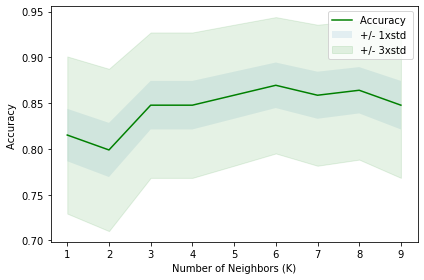

In [44]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

### Build KNN model with k=6 

In [45]:
k=6 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
yhat2 = neigh.predict(X_test)
yhat2[0:5]
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat2))

Train set Accuracy:  0.8828337874659401
Test set Accuracy:  0.8695652173913043


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


## CONFUSION MATRIX KNN v2.1

In [46]:
print(confusion_matrix(y_test, yhat2, labels=[1,0]))

[[86 10]
 [14 74]]


Confusion matrix, without normalization
[[86 10]
 [14 74]]


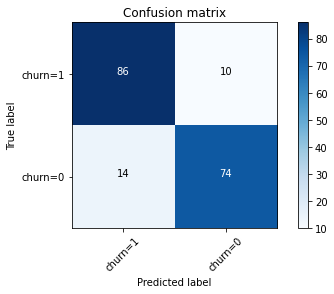

In [47]:
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

### KNN k=6 ACCURACY REPORT 

In [48]:
print (classification_report(y_test, yhat2))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        88
           1       0.86      0.90      0.88        96

   micro avg       0.87      0.87      0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



## KNN PLOT PREDICTTED LABELS VS REAL LABELS 

Text(0.5, 1.0, 'REAL LABELS')

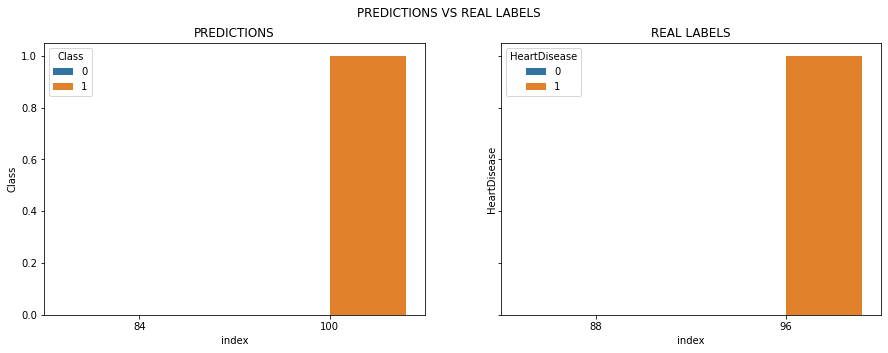

In [49]:
yhat_df =  pd.DataFrame(yhat2, columns=['Class']).reset_index()
ytest_df = pd.DataFrame(y_test)
ytest_df = ytest_df.reset_index()

yhat_bins = yhat_df.groupby('Class').count().reset_index()
ytest_bins = ytest_df.groupby('HeartDisease').count().reset_index()






fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('PREDICTIONS VS REAL LABELS')

sns.barplot(data=yhat_bins,ax=axes[0],x="index", y="Class",hue="Class")
axes[0].set_title('PREDICTIONS')

 
sns.barplot(data=ytest_bins,ax=axes[1], x="index", y="HeartDisease",hue="HeartDisease")
axes[1].set_title('REAL LABELS')

## DESICION TREE IMPLEMENTATION v1.1

In [71]:
from sklearn.tree import DecisionTreeClassifier
parameters_tree = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
0     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# define the model
tree = DecisionTreeClassifier(random_state = 12345)

# define the grid search object
grid_search_tree = GridSearchCV(
    estimator = tree,
    param_grid = parameters_tree,
    scoring = 'accuracy',
    cv = 10
)
# execute search
tree_cv = grid_search_tree.fit(X_train, y_train)

#dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
#dTree.fit(X_train,y_train)
#PredTree = dTree.predict(X_test)
#print (PredTree [0:5])
#print (y_test [0:5])

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spec

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8419618528610354


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wis

In [72]:
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

#print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, PredTree))

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8419618528610354


In [73]:
print('Accuracy on test data is: {:.3f}'.format(tree_cv.score(X_test, y_test)))

Accuracy on test data is: 0.837


## DESICION TREE PREDICTED LABELS VS REAL LABELS PLOT 


Text(0.5, 1.0, 'REAL LABELS')

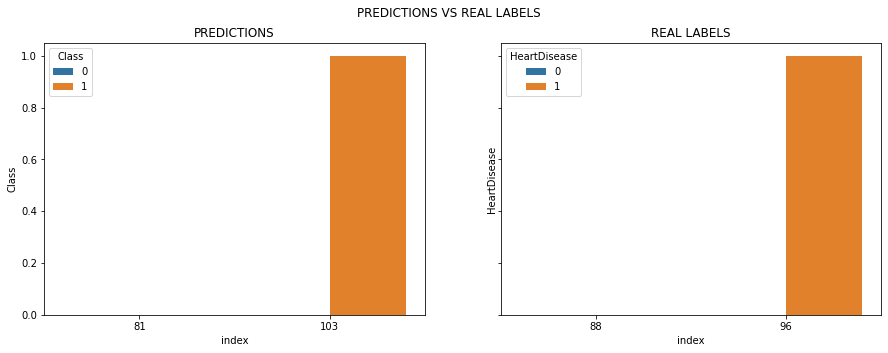

In [52]:
yhat_df =  pd.DataFrame(PredTree, columns=['Class']).reset_index()
ytest_df = pd.DataFrame(y_test)
ytest_df = ytest_df.reset_index()

yhat_bins = yhat_df.groupby('Class').count().reset_index()
ytest_bins = ytest_df.groupby('HeartDisease').count().reset_index()






fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('PREDICTIONS VS REAL LABELS')

sns.barplot(data=yhat_bins,ax=axes[0],x="index", y="Class",hue="Class")
axes[0].set_title('PREDICTIONS')

 
sns.barplot(data=ytest_bins,ax=axes[1], x="index", y="HeartDisease",hue="HeartDisease")
axes[1].set_title('REAL LABELS')

## SUPPORT VECTOR MACHINE IMPLEMENTATION 


In [75]:
from sklearn.svm import SVC
parameters_svm = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

# define the model
svm = SVC(random_state = 12345)

# define the grid search object
grid_search_svm = GridSearchCV(
    estimator = svm,
    param_grid = parameters_svm,
    scoring = 'accuracy',
    cv = 10
)
# execute search
svm_cv = grid_search_svm.fit(X_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spec

KeyboardInterrupt: 

In [ ]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

In [ ]:
print('Accuracy on test data is: {:.3f}'.format(svm_cv.score(X_test, y_test)))